<a href="https://colab.research.google.com/github/MarjeteV/data620/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

Your Final project should incorporate one or both of the two main themes in this course: network analysis and text processing. If you are building a model or models, explain how you evaluate the "goodness" of the chosen model and parameters.



**Group**(The DataDriven Team): Susanna Wong, Puja Roy, Mikhail Broomes & Marjete Vucinaj

The goal of this project is to understand the patterns and relationships within Jeopardy! questions can provide insights into the shows content evolution and difficulty distribution. This analysis will be valuable to contesters and fans interested in the structure of the quiz questions and their categorizations.

We will try to predict what category a question would be based on the body of text. We will attempt to use text processing to extract features and train initial models for predicting categories.

In [ ]:
import pandas as pd
import io
import networkx as nx
import numpy as np
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt


The dataset contains 150,000 Jeopardy! questions in CSV format, sourced from www.j-archive.com. This subset is part of a larger collection of over 216,930 questions, covering about 83% of all questions aired on the show, totaling 252,583 questions. It includes details such as question category, value (except for final rounds), question text, answer, round type, episode number, and air date.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MAB592/Data620/main/Assignments/Final%20Project/JEOPARDY_CSV_150000.csv')

In [ ]:
df.head()

,Unnamed: 0,Show Number,Air Date,Round,Category,Value,Question,Answer
0,0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [ ]:
df.dropna(subset=[' Value'])

df[' Value'] = df[' Value'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
df.isna().sum()

Unnamed: 0        0
Show Number       0
 Air Date         0
 Round            0
 Category         0
 Value         2510
 Question         0
 Answer           2
dtype: int64

In [ ]:
len(df[' Category'].unique())

20584

In [ ]:
df[' Round'].unique()

array(['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!', 'Tiebreaker'],
      dtype=object)

In [ ]:
df[' Value'].unique()

array([2.000e+02, 4.000e+02, 6.000e+02, 8.000e+02, 2.000e+03, 1.000e+03,
       1.200e+03, 1.600e+03, 3.200e+03,       nan, 5.000e+03, 1.000e+02,
       3.000e+02, 5.000e+02, 1.500e+03, 4.800e+03, 1.800e+03, 1.100e+03,
       2.200e+03, 3.400e+03, 3.000e+03, 4.000e+03, 6.800e+03, 1.900e+03,
       3.100e+03, 7.000e+02, 1.400e+03, 2.800e+03, 8.000e+03, 6.000e+03,
       2.400e+03, 1.200e+04, 3.800e+03, 2.500e+03, 6.200e+03, 1.000e+04,
       7.000e+03, 1.492e+03, 7.400e+03, 1.300e+03, 7.200e+03, 2.600e+03,
       3.300e+03, 5.400e+03, 4.500e+03, 2.100e+03, 9.000e+02, 3.600e+03,
       2.127e+03, 3.670e+02, 4.400e+03, 3.500e+03, 2.900e+03, 3.900e+03,
       4.100e+03, 4.600e+03, 1.080e+04, 2.300e+03, 5.600e+03, 1.111e+03,
       8.200e+03, 5.800e+03, 7.500e+02, 7.500e+03, 1.700e+03, 9.000e+03,
       6.100e+03, 1.020e+03, 4.700e+03, 2.021e+03, 5.200e+03, 3.389e+03,
       4.200e+03, 5.000e+00, 2.001e+03, 1.263e+03, 4.637e+03, 3.201e+03,
       6.600e+03, 3.700e+03, 2.990e+03, 5.500e+03, 

In [ ]:
G = nx.Graph()

In [ ]:
categories = df[' Category'].unique()
rounds = df[' Round'].unique()
G.add_nodes_from(categories, bipartite=0)
G.add_nodes_from(rounds, bipartite=1)

In [ ]:
pos = nx.drawing.layout.bipartite_layout(G, categories)


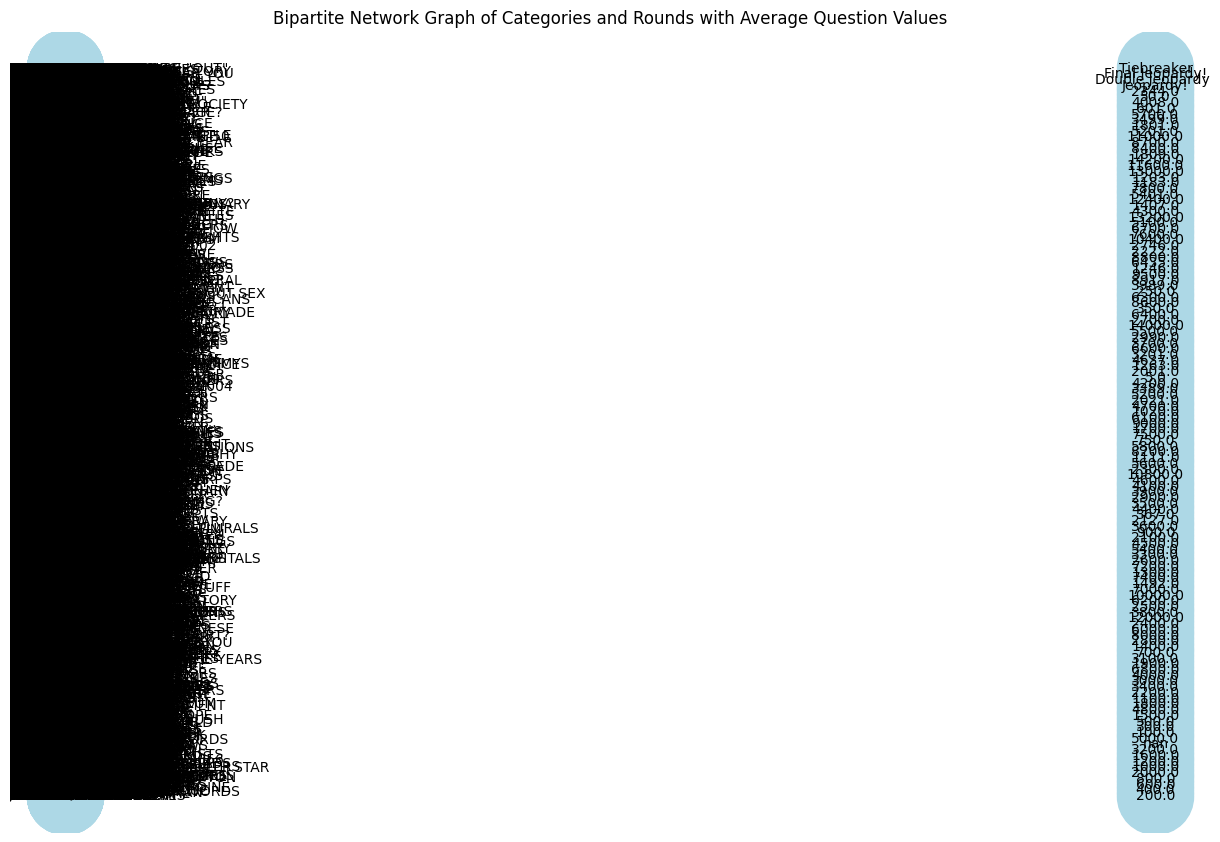

In [ ]:
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Bipartite Network Graph of Categories and Rounds with Average Question Values')
plt.show()

<ipython-input-60-bf243e650412>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[' Category'] = df_cleaned[' Category'].str.strip()
<ipython-input-60-bf243e650412>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[' Round'] = df_cleaned[' Round'].str.strip()


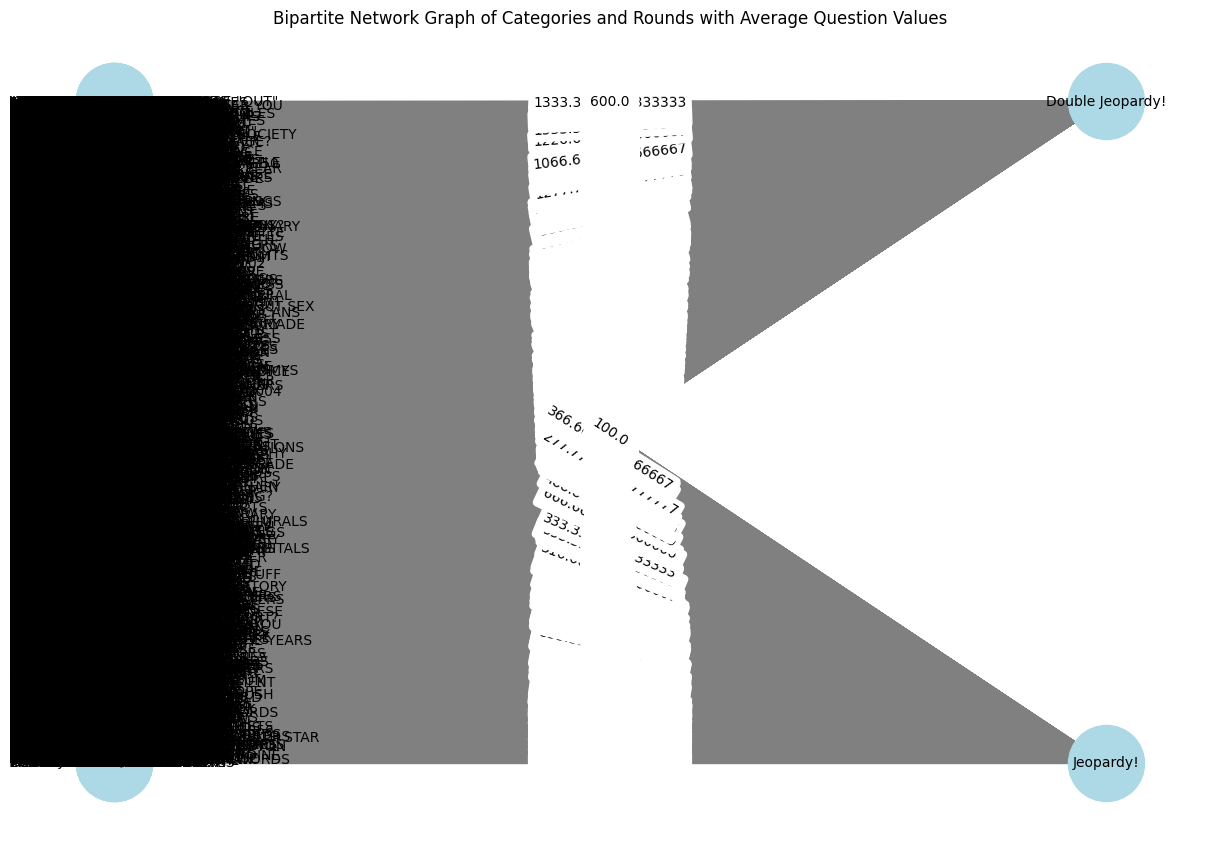

In [ ]:
# Clean the 'Value' column: remove dollar signs and commas, then convert to float
df[' Value'] = df[' Value'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Drop rows with NaN values in the 'Value' column
df_cleaned = df.dropna(subset=[' Value'])

# Strip any leading/trailing whitespace from the 'Category' and 'Round' columns
df_cleaned[' Category'] = df_cleaned[' Category'].str.strip()
df_cleaned[' Round'] = df_cleaned[' Round'].str.strip()

# Create a dictionary to store the edge weights
edge_weights = {}

# Iterate through the DataFrame
for index, row in df_cleaned.iterrows():
    category = row[' Category']
    round_ = row[' Round']
    edge = (category, round_)
    if edge not in edge_weights:
        edge_weights[edge] = []
    edge_weights[edge].append(row[' Value'])

# Create a NetworkX graph
G = nx.Graph()

# Add nodes for categories and rounds
categories = df_cleaned[' Category'].unique()
rounds = df_cleaned[' Round'].unique()
G.add_nodes_from(categories, bipartite=0)
G.add_nodes_from(rounds, bipartite=1)

# Add edges with average weights
for edge, values in edge_weights.items():
    avg_weight = sum(values) / len(values)
    G.add_edge(edge[0], edge[1], weight=avg_weight)

# Position the nodes using bipartite layout
pos = nx.drawing.layout.bipartite_layout(G, categories)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Bipartite Network Graph of Categories and Rounds with Average Question Values')
plt.show()